In [6]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'cmr10'
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['font.size'] = 12

In [7]:
with open("runs/run_26-03-2025_17-25-29/run_26-03-2025_17-25-29_metrics.pkl", 'rb') as f:
    metrics = pickle.load(f)

print(metrics.keys())

dict_keys(['training_losses', 'validation_losses', 'conf_matrices', 'accuracies', 'f1s', 'precisions', 'recalls', 'roc_curves', 'roc_aucs', 'train_time', 'num_training_images'])


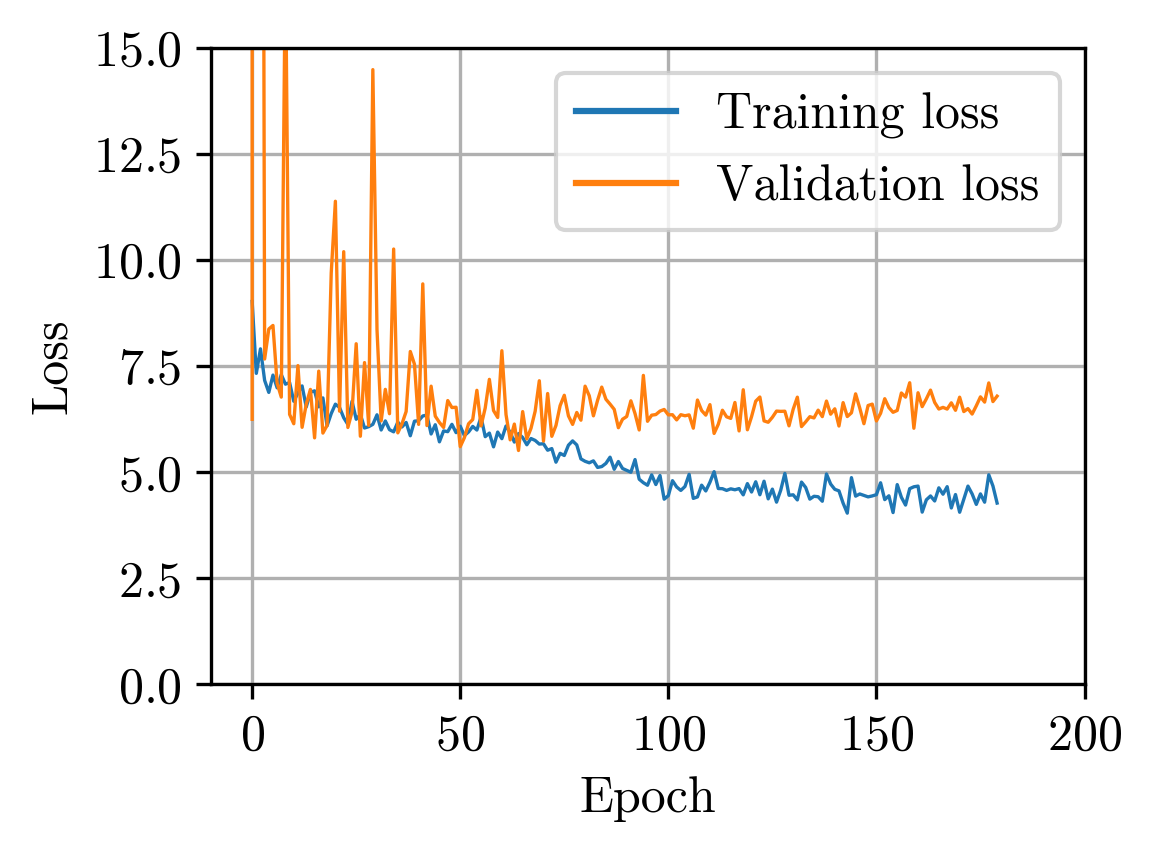

In [8]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
ax.plot(metrics['training_losses'], label='Training loss')
ax.plot(metrics['validation_losses'], label='Validation loss')
ax.set_ylim(0, 15)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
for line in ax.get_lines():
    line.set_linewidth(0.8)
ax.grid(True)
ax.set_xlim(-10, 200)
plt.tight_layout()
plt.savefig('figures/pointnet_losses.png', dpi=300, bbox_inches='tight')
plt.show()

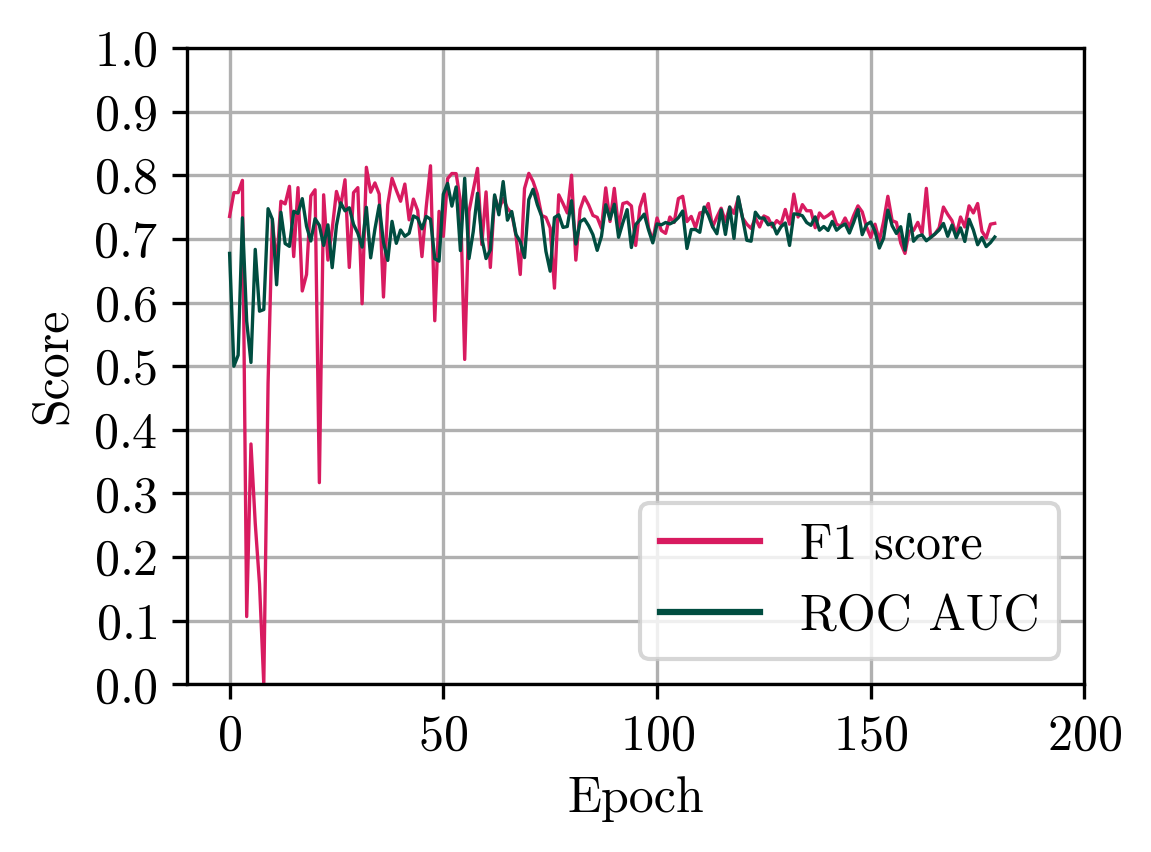

In [9]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
ax.plot(metrics['f1s'], label='F1 score', color='#D81B60')
#ax.plot(metrics['precisions'], label='Precision')
#ax.plot(metrics['recalls'], label='Recall')
ax.plot(metrics['roc_aucs'], label='ROC AUC', color='#004D40')
ax.set_ylim(0, 1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Score')
ax.legend()
for line in ax.get_lines():
    line.set_linewidth(0.8)
ax.grid(True)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_xlim(-10, 200)
plt.tight_layout()
plt.savefig('figures/pointnet_performance.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
print(f"Mean of last 25 F1 scores: {np.mean(metrics['f1s'][-25:])}")
print(f"Mean of last 25 AUC scores: {np.mean(metrics['roc_aucs'][-25:])}")

Mean of last 25 F1 scores: 0.7231388688087463
Mean of last 25 AUC scores: 0.7073823529411765
